In [8]:
import itk
import os
import cv2

# Define the file path
file_path = '/tmp/frm-0231.png'

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

image = cv2.imread(file_path)

PixelType = itk.F
# Try to read the file using ITK
try:
    image = itk.imread(file_path,PixelType , fallback_only=True)
    print("File read successfully.")
except RuntimeError as e:
    print(f"Error reading file: {e}")
    # Additional troubleshooting steps
    print("Ensure the file format is supported and the necessary libraries are installed.")


Error reading file: Could not create IO object for reading file /tmp/frm-0231.png
Ensure the file format is supported and the necessary libraries are installed.


In [13]:
image = cv2.imread(file_path)
print(type(image), image.dtype, image.shape)
image_matrix=image
itk_image = itk.GetImageFromArray(image_matrix)

<class 'numpy.ndarray'> uint8 (540, 720, 3)


ITK Image Type: <class 'itk.itkImagePython.itkImageUC3'>


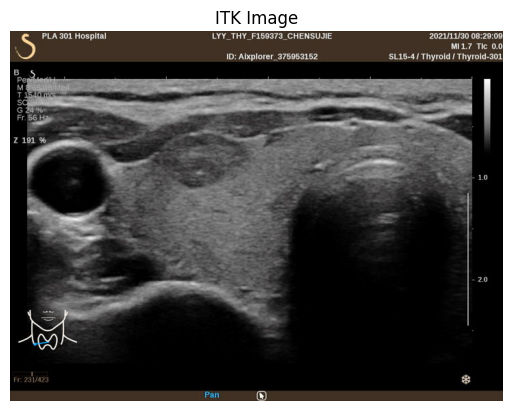

In [14]:
# Convert the NumPy array to an ITK image
itk_image = itk.GetImageFromArray(image_matrix)

# Print the ITK image type
print(f"ITK Image Type: {type(itk_image)}")

# Optionally, display the image using Matplotlib
plt.imshow(itk.GetArrayViewFromImage(itk_image), cmap='gray')
plt.title('ITK Image')
plt.axis('off')
plt.show()

ITK Image Type: <class 'itk.itkImagePython.itkImageUC2'>


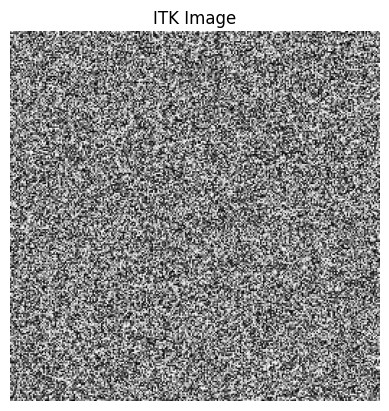

** ERROR (nifti_image_write_engine): cannot open output file 'path/to/your/output_image.nii'


RuntimeError: /work/ITK-source/ITK/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:2375:
ITK ERROR: NiftiImageIO(0x5631d2325860): ERROR: nifti library failed to write image: path/to/your/output_image.nii

In [6]:
import itk
import numpy as np
import matplotlib.pyplot as plt

# Create a NumPy array (example: a 2D grayscale image)
image_matrix = np.random.rand(256, 256) * 255  # Example: 256x256 image with random values
image_matrix = image_matrix.astype(np.uint8)  # Ensure the data type is uint8

# Convert the NumPy array to an ITK image
itk_image = itk.GetImageFromArray(image_matrix)

# Print the ITK image type
print(f"ITK Image Type: {type(itk_image)}")

# Optionally, display the image using Matplotlib
plt.imshow(itk.GetArrayViewFromImage(itk_image), cmap='gray')
plt.title('ITK Image')
plt.axis('off')
plt.show()

# Optionally, save the ITK image in a different format
output_file_path = 'path/to/your/output_image.nii'  # Example: NIfTI format
itk.imwrite(itk_image, output_file_path)
print(f"ITK image saved to {output_file_path}")


In [2]:
help(itk.imread)


Help on function imread in module itk.support.extras:

imread(filename: Union[str, bytes, os.PathLike, Sequence[Union[str, os.PathLike]]], pixel_type: Optional[ForwardRef('itkt.PixelTypes')] = None, fallback_only: bool = False, imageio: Optional[ForwardRef('itkt.ImageIOBase')] = None, series_uid: Union[int, str, NoneType] = None) -> 'itkt.ImageBase'
    Read an image from a file or series of files and return an itk.Image.
    
    Parameters
    ----------
    
    filename :
        File path for a single file, a list of files for an image series, or a
        directory for a DICOM image series.
    
    pixel_type :
        Image pixel type to cast to when loading.
    
    fallback_only :
        If true, first try to automatically deduce the image pixel type, and
        only use the given `pixel_type` if automatic deduction fails.
    
    imageio :
        Use the provided itk.ImageIOBase derived instance to read the file.
    
    series_uid :
        If filename is a directory 